In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
flu_activity = pd.read_csv("Flu data_2008-2019.csv")

In [4]:
flu_activity.head()

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
0,District of Columbia,https://dchealth.dc.gov/flu%20,Influenza Information,Level 0,Insufficient Data,Jan-09-2016,1,2015-16
1,Virgin Islands,http://doh.vi.gov/,Influenza,Level 0,Insufficient Data,Jan-09-2016,1,2015-16
2,District of Columbia,https://dchealth.dc.gov/flu%20,Influenza Information,Level 0,Insufficient Data,Jan-16-2016,2,2015-16
3,Virgin Islands,http://doh.vi.gov/,Influenza,Level 0,Insufficient Data,Jan-16-2016,2,2015-16
4,District of Columbia,https://dchealth.dc.gov/flu%20,Influenza Information,Level 0,Insufficient Data,Jan-23-2016,3,2015-16


In [5]:
# Filtering Illinois data
illinois_activity=flu_activity.loc[flu_activity['STATENAME'] == 'Illinois']

In [6]:
# Filtering California data
cali_activity=flu_activity.loc[flu_activity['STATENAME'] == 'California']

In [7]:
cali_activity.head()

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
1292,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,Jul-20-2019,29,2018-19
1339,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,Jul-13-2019,28,2018-19
1386,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,Jul-06-2019,27,2018-19
1408,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,Jun-29-2019,26,2018-19
1414,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,Jun-15-2019,24,2018-19


In [8]:
illinois_activity.head()

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
1209,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Jul-20-2019,29,2018-19
1247,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Jul-13-2019,28,2018-19
1294,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Jul-06-2019,27,2018-19
1341,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Jun-29-2019,26,2018-19
1430,Illinois,http://www.dph.illinois.gov/topics-services/di...,Seasonal Influenza Surveillance Reports,Level 1,Minimal,Jun-22-2019,25,2018-19


In [9]:
illinois_activity.drop(['URL', 'WEBSITE', 
                'WEEK', 'SEASON'], axis=1, inplace=True)

In [10]:
cali_activity.drop(['URL', 'WEBSITE', 
                'WEEK', 'SEASON'], axis=1, inplace=True)

In [11]:
illinois_activity.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND
1209,Illinois,Level 1,Minimal,Jul-20-2019
1247,Illinois,Level 1,Minimal,Jul-13-2019
1294,Illinois,Level 1,Minimal,Jul-06-2019
1341,Illinois,Level 1,Minimal,Jun-29-2019
1430,Illinois,Level 1,Minimal,Jun-22-2019


In [12]:
print(illinois_activity.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 1209 to 31563
Data columns (total 4 columns):
STATENAME               594 non-null object
ACTIVITY LEVEL          594 non-null object
ACTIVITY LEVEL LABEL    594 non-null object
WEEKEND                 594 non-null object
dtypes: object(4)
memory usage: 23.2+ KB
None


In [13]:

illinois_activity['WEEKEND'] = pd.to_datetime(illinois_activity['WEEKEND'], errors='coerce')

In [14]:

cali_activity['WEEKEND'] = pd.to_datetime(cali_activity['WEEKEND'], errors='coerce')

In [15]:
illinois_activity.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND
1209,Illinois,Level 1,Minimal,2019-07-20
1247,Illinois,Level 1,Minimal,2019-07-13
1294,Illinois,Level 1,Minimal,2019-07-06
1341,Illinois,Level 1,Minimal,2019-06-29
1430,Illinois,Level 1,Minimal,2019-06-22


In [16]:
illinois_activity = illinois_activity.sort_values(by=['WEEKEND'])

In [17]:
cali_activity = cali_activity.sort_values(by=['WEEKEND'])

In [18]:
illinois_activity.rename(columns={'WEEKEND': 'week'}, inplace=True)

In [19]:
cali_activity.rename(columns={'WEEKEND': 'week'}, inplace=True)

In [20]:
illinois_activity.set_index('week', inplace=True)

In [21]:
cali_activity.set_index('week', inplace=True)

In [22]:
illinois_activity.index = illinois_activity.index + pd.to_timedelta(-1, unit='D')

In [23]:
cali_activity.index = cali_activity.index + pd.to_timedelta(-1, unit='D')

In [24]:
illinois_activity.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL
week,,,
2008-10-03,Illinois,Level 1,Minimal
2008-10-10,Illinois,Level 1,Minimal
2008-10-17,Illinois,Level 1,Minimal
2008-10-24,Illinois,Level 1,Minimal
2008-10-31,Illinois,Level 1,Minimal


In [25]:
cali_activity.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL
week,,,
2008-10-03,California,Level 1,Minimal
2008-10-10,California,Level 1,Minimal
2008-10-17,California,Level 1,Minimal
2008-10-24,California,Level 1,Minimal
2008-10-31,California,Level 1,Minimal


In [26]:
# Reading the dataset
illinois_tweet_data = pd.read_csv("Illinois_Emotion_State_Count.csv")

In [27]:
cali_tweet_data = pd.read_csv("California_Emotion_State_Count.csv")

In [28]:
illinois_tweet_data.head()

,Week of:,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
0,07/10/09,148,7,27,12,10,0,16,74,2
1,07/17/09,169,7,16,16,8,0,19,98,5
2,07/24/09,179,7,33,12,10,0,18,99,0
3,07/31/09,124,6,21,10,4,0,14,68,1
4,08/07/09,125,4,17,17,4,0,13,69,1


In [29]:
cali_tweet_data.head()

,Week of:,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
0,7/10/2009,597,32,78,46,23,0,59,352,7
1,7/17/2009,830,30,105,84,45,2,91,462,11
2,7/24/2009,923,37,131,72,56,2,100,515,10
3,7/31/2009,650,21,105,61,43,1,72,339,8
4,8/7/2009,538,21,65,49,31,1,65,302,4


In [30]:
print(illinois_tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 10 columns):
Week of:                 547 non-null object
Total Number of Posts    547 non-null int64
Fear                     547 non-null int64
Anger                    547 non-null int64
Joy                      547 non-null int64
Sadness                  547 non-null int64
Surprise                 547 non-null int64
Neutral                  547 non-null int64
Disgust                  547 non-null int64
No Emotion Attached      547 non-null int64
dtypes: int64(9), object(1)
memory usage: 42.9+ KB
None


In [31]:
illinois_tweet_data['Week of: '] = pd.to_datetime(illinois_tweet_data['Week of: '], errors='coerce')

In [32]:
cali_tweet_data['Week of: '] = pd.to_datetime(cali_tweet_data['Week of: '], errors='coerce')

In [33]:
illinois_tweet_data.rename(columns={'Week of: ': 'week'}, inplace=True)

In [34]:
cali_tweet_data.rename(columns={'Week of: ': 'week'}, inplace=True)

In [35]:
illinois_tweet_data.set_index('week', inplace=True)

In [36]:
cali_tweet_data.set_index('week', inplace=True)

In [37]:
illinois_tweet_data.head()

,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,
2009-07-10,148,7,27,12,10,0,16,74,2
2009-07-17,169,7,16,16,8,0,19,98,5
2009-07-24,179,7,33,12,10,0,18,99,0
2009-07-31,124,6,21,10,4,0,14,68,1
2009-08-07,125,4,17,17,4,0,13,69,1


In [38]:
cali_tweet_data.head()

,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,
2009-07-10,597,32,78,46,23,0,59,352,7
2009-07-17,830,30,105,84,45,2,91,462,11
2009-07-24,923,37,131,72,56,2,100,515,10
2009-07-31,650,21,105,61,43,1,72,339,8
2009-08-07,538,21,65,49,31,1,65,302,4


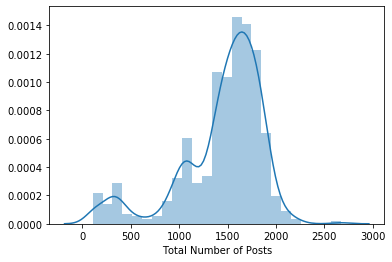

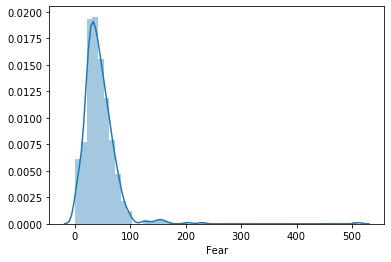

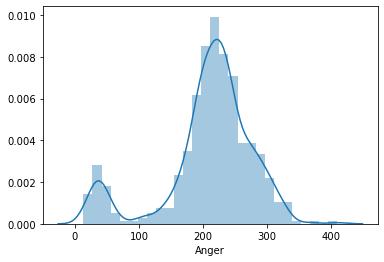

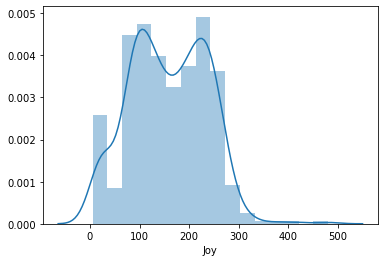

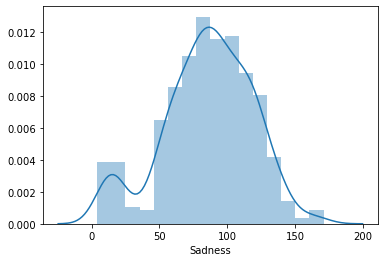

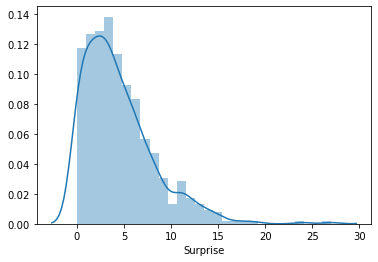

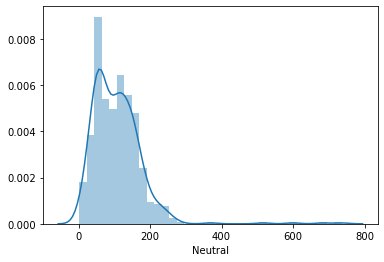

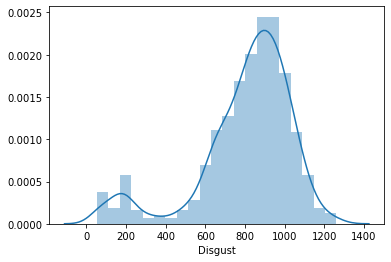

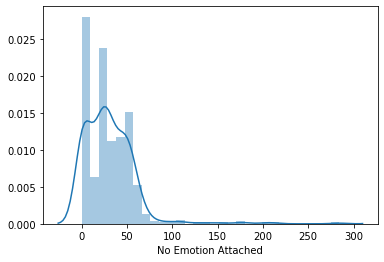

In [39]:
for col in illinois_tweet_data.columns:
    sns.distplot(illinois_tweet_data[col])
    plt.show()

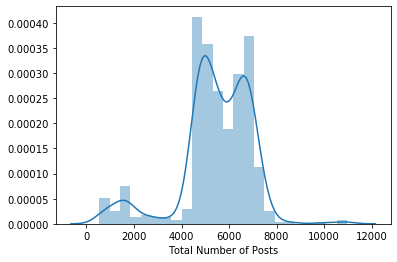

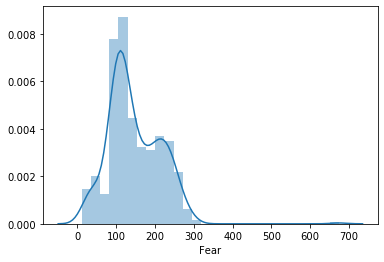

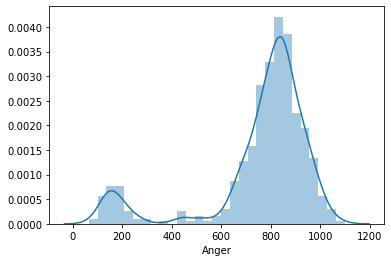

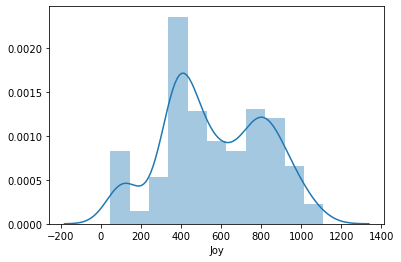

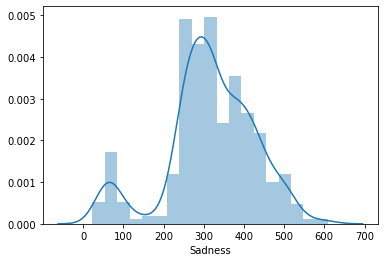

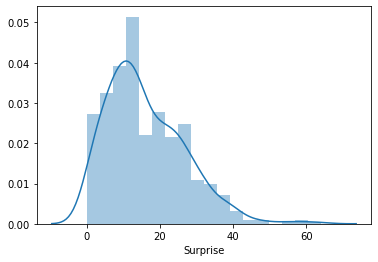

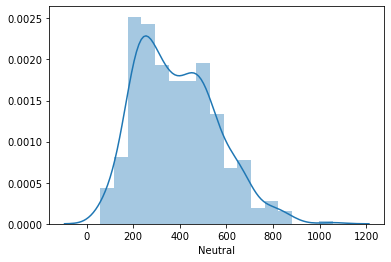

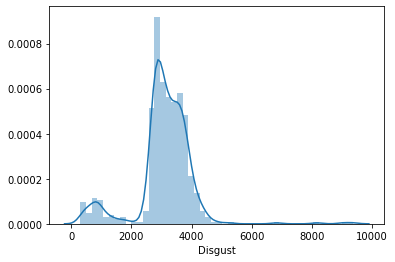

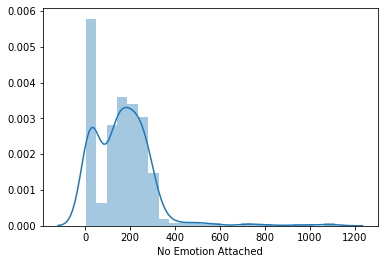

In [40]:
for col in cali_tweet_data.columns:
    sns.distplot(cali_tweet_data[col])
    plt.show()

In [39]:
#illinois_tweet_data.loc['2009-07-17']
illinois_activity.loc['2009-07-17']

STATENAME               Illinois
ACTIVITY LEVEL           Level 1
ACTIVITY LEVEL LABEL     Minimal
Name: 2009-07-17 00:00:00, dtype: object

In [40]:
cali_activity.loc['2009-07-17']

STATENAME               California
ACTIVITY LEVEL             Level 3
ACTIVITY LEVEL LABEL       Minimal
Name: 2009-07-17 00:00:00, dtype: object

In [41]:
print(illinois_tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 547 entries, 2009-07-10 to 2019-12-27
Data columns (total 9 columns):
Total Number of Posts    547 non-null int64
Fear                     547 non-null int64
Anger                    547 non-null int64
Joy                      547 non-null int64
Sadness                  547 non-null int64
Surprise                 547 non-null int64
Neutral                  547 non-null int64
Disgust                  547 non-null int64
No Emotion Attached      547 non-null int64
dtypes: int64(9)
memory usage: 42.7 KB
None


In [42]:
print(cali_tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 547 entries, 2009-07-10 to 2019-12-27
Data columns (total 9 columns):
Total Number of Posts    547 non-null int64
Fear                     547 non-null int64
Anger                    547 non-null int64
Joy                      547 non-null int64
Sadness                  547 non-null int64
Surprise                 547 non-null int64
Neutral                  547 non-null int64
Disgust                  547 non-null int64
No Emotion Attached      547 non-null int64
dtypes: int64(9)
memory usage: 42.7 KB
None


In [43]:
merge=pd.merge(illinois_activity,illinois_tweet_data, how='inner', left_index=True, right_index=True)

In [44]:
merge2=pd.merge(cali_activity,cali_tweet_data, how='inner', left_index=True, right_index=True)

In [45]:
merge.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,,,,
2009-07-10,Illinois,Level 1,Minimal,148,7,27,12,10,0,16,74,2
2009-07-17,Illinois,Level 1,Minimal,169,7,16,16,8,0,19,98,5
2009-07-24,Illinois,Level 1,Minimal,179,7,33,12,10,0,18,99,0
2009-07-31,Illinois,Level 1,Minimal,124,6,21,10,4,0,14,68,1
2009-08-07,Illinois,Level 1,Minimal,125,4,17,17,4,0,13,69,1


In [46]:
merge2.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,,,,
2009-07-10,California,Level 1,Minimal,597,32,78,46,23,0,59,352,7
2009-07-17,California,Level 3,Minimal,830,30,105,84,45,2,91,462,11
2009-07-24,California,Level 1,Minimal,923,37,131,72,56,2,100,515,10
2009-07-31,California,Level 1,Minimal,650,21,105,61,43,1,72,339,8
2009-08-07,California,Level 1,Minimal,538,21,65,49,31,1,65,302,4


In [47]:
merge.drop(['STATENAME'], axis=1, inplace=True)

In [48]:
merge2.drop(['STATENAME'], axis=1, inplace=True)

In [49]:
merge['ACTIVITY LEVEL'].astype('category').value_counts()

Level 1     317
Level 2      56
Level 4      40
Level 3      36
Level 10     27
Level 5      19
Level 7      17
Level 6      17
Level 9      10
Level 8       8
Name: ACTIVITY LEVEL, dtype: int64

In [50]:
merge2['ACTIVITY LEVEL'].astype('category').value_counts()

Level 1     336
Level 2      57
Level 3      31
Level 6      28
Level 4      27
Level 5      21
Level 7      16
Level 10     15
Level 8      13
Level 9       3
Name: ACTIVITY LEVEL, dtype: int64

In [51]:
merge['ACTIVITY LEVEL LABEL'].astype('category').value_counts()

Minimal     409
Low          59
High         45
Moderate     34
Name: ACTIVITY LEVEL LABEL, dtype: int64

In [52]:
merge2['ACTIVITY LEVEL LABEL'].astype('category').value_counts()

Minimal     424
Low          48
Moderate     44
High         31
Name: ACTIVITY LEVEL LABEL, dtype: int64

In [53]:
# Mapping Activity level categories to integers
def num_map(x):
    return x.map({'Level 1': 1, "Level 2": 2, "Level 3": 3, "Level 4": 4, "Level 5": 5, "Level 6": 6, "Level 7": 7,
                 'Level 8': 8, 'Level 9': 9, 'Level 10': 10})

# Applying the function to the two columns
merge[['ACTIVITY LEVEL']] = merge[['ACTIVITY LEVEL']].apply(num_map)

In [54]:
merge2[['ACTIVITY LEVEL']] = merge2[['ACTIVITY LEVEL']].apply(num_map)

In [55]:
# Subset all categorical variables
merge_categorical = merge.select_dtypes(include=['object'])
merge_categorical.head()

,ACTIVITY LEVEL LABEL
week,
2009-07-10,Minimal
2009-07-17,Minimal
2009-07-24,Minimal
2009-07-31,Minimal
2009-08-07,Minimal


In [56]:
# Subset all categorical variables
merge2_categorical = merge2.select_dtypes(include=['object'])
merge2_categorical.head()

,ACTIVITY LEVEL LABEL
week,
2009-07-10,Minimal
2009-07-17,Minimal
2009-07-24,Minimal
2009-07-31,Minimal
2009-08-07,Minimal


In [57]:
merge_dummies = pd.get_dummies(merge_categorical, drop_first=True)
merge_dummies.head()

,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate
week,,,
2009-07-10,0,1,0
2009-07-17,0,1,0
2009-07-24,0,1,0
2009-07-31,0,1,0
2009-08-07,0,1,0


In [58]:
merge2_dummies = pd.get_dummies(merge2_categorical, drop_first=True)
merge2_dummies.head()

,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate
week,,,
2009-07-10,0,1,0
2009-07-17,0,1,0
2009-07-24,0,1,0
2009-07-31,0,1,0
2009-08-07,0,1,0


In [59]:
# Drop categorical variable columns
merge = merge.drop(list(merge_categorical.columns), axis=1)

In [60]:
merge2 = merge2.drop(list(merge2_categorical.columns), axis=1)

In [61]:
# Concatenate dummy variables with X
merge = pd.concat([merge, merge_dummies], axis=1)

In [62]:
merge2 = pd.concat([merge2, merge2_dummies], axis=1)

In [63]:
merge.head()

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate
week,,,,,,,,,,,,,
2009-07-10,1,148,7,27,12,10,0,16,74,2,0,1,0
2009-07-17,1,169,7,16,16,8,0,19,98,5,0,1,0
2009-07-24,1,179,7,33,12,10,0,18,99,0,0,1,0
2009-07-31,1,124,6,21,10,4,0,14,68,1,0,1,0
2009-08-07,1,125,4,17,17,4,0,13,69,1,0,1,0


In [64]:
merge['week'] = merge.index

In [65]:
merge['month']=merge['week'].dt.month

In [66]:
# Filtering Flu season months for Illinois
merge_month_filtered = merge.loc[merge['month'].isin([10,11,12,1,2,3,4])]

In [67]:
merge_month_filtered.month.unique()

array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [68]:
merge_month_filtered=merge_month_filtered.drop(['week', 'month'], axis = 1)

In [69]:
merge2.describe()

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,2.407678,5450.740402,145.994516,758.932358,565.378428,317.873857,16.012797,386.180987,3093.438757,166.928702,0.087751,0.775137,0.080439
std,2.342507,1526.421110,67.466461,216.896316,252.906970,110.122528,10.681615,170.847034,952.046189,137.937942,0.283192,0.417874,0.272220
min,1.000000,538.000000,11.000000,65.000000,46.000000,23.000000,0.000000,59.000000,302.000000,4.000000,0.000000,0.000000,0.000000
25%,1.000000,4797.500000,102.000000,733.000000,385.000000,263.500000,8.000000,248.000000,2810.500000,42.000000,0.000000,1.000000,0.000000
50%,1.000000,5507.000000,129.000000,819.000000,532.000000,316.000000,14.000000,367.000000,3148.000000,157.000000,0.000000,1.000000,0.000000
75%,3.000000,6584.000000,199.500000,879.000000,789.000000,391.000000,23.000000,499.000000,3598.500000,234.500000,0.000000,1.000000,0.000000
max,10.000000,10963.000000,674.000000,1098.000000,1110.000000,610.000000,64.000000,1058.000000,9369.000000,1111.000000,1.000000,1.000000,1.000000


In [70]:
merge.describe()

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate,month
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,2.627057,1442.367459,44.601463,209.835466,157.787934,85.447898,4.405850,107.074954,803.027422,30.186472,0.107861,0.747715,0.062157,6.661792
std,2.593285,434.920613,32.773144,70.150403,77.015761,33.093753,3.809065,72.290520,240.262679,28.714171,0.310489,0.434722,0.241662,3.446193
min,1.000000,105.000000,1.000000,13.000000,5.000000,4.000000,0.000000,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1296.500000,27.000000,190.000000,96.500000,66.000000,2.000000,56.500000,712.500000,6.500000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,1559.000000,40.000000,221.000000,156.000000,87.000000,4.000000,101.000000,856.000000,26.000000,0.000000,1.000000,0.000000,7.000000
75%,4.000000,1731.000000,56.500000,249.000000,223.000000,109.000000,6.000000,144.000000,957.500000,46.000000,0.000000,1.000000,0.000000,10.000000
max,10.000000,2670.000000,511.000000,410.000000,481.000000,171.000000,27.000000,736.000000,1261.000000,284.000000,1.000000,1.000000,1.000000,12.000000


In [71]:
merge2['week'] = merge2.index

In [72]:
merge2['month']=merge2['week'].dt.month

In [73]:
# Filtering Flu season months for California
merge_month_filtered2 = merge2.loc[merge2['month'].isin([10,11,12,1,2,3,4])]

In [74]:
merge_month_filtered2.month.unique()

array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [75]:
merge_month_filtered2=merge_month_filtered2.drop(['week', 'month'], axis = 1)

In [76]:
merge.shape

(547, 15)

In [77]:
merge2.shape

(547, 15)

In [78]:
merge_month_filtered.shape

(316, 13)

In [95]:
merge_month_filtered2.shape

(316, 13)

Text(0, 0.5, 'Count')

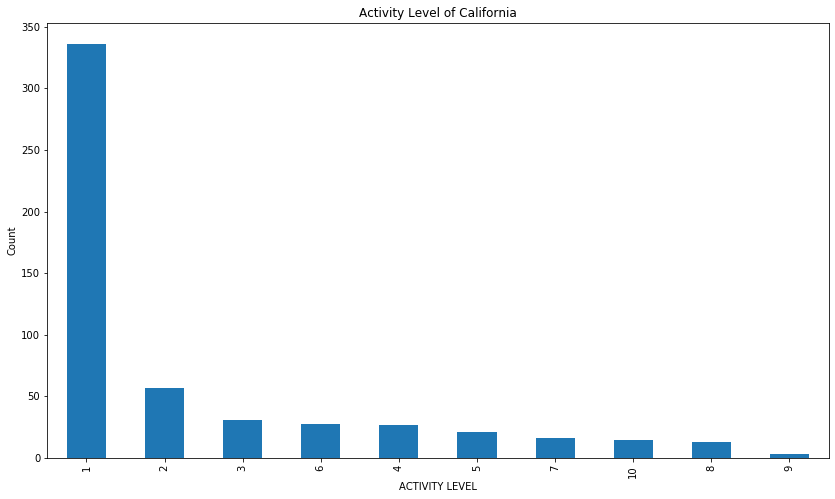

In [80]:
# Class distribution of unfiltered California data

ax = merge2['ACTIVITY LEVEL'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Activity Level of California")
ax.set_xlabel("ACTIVITY LEVEL")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

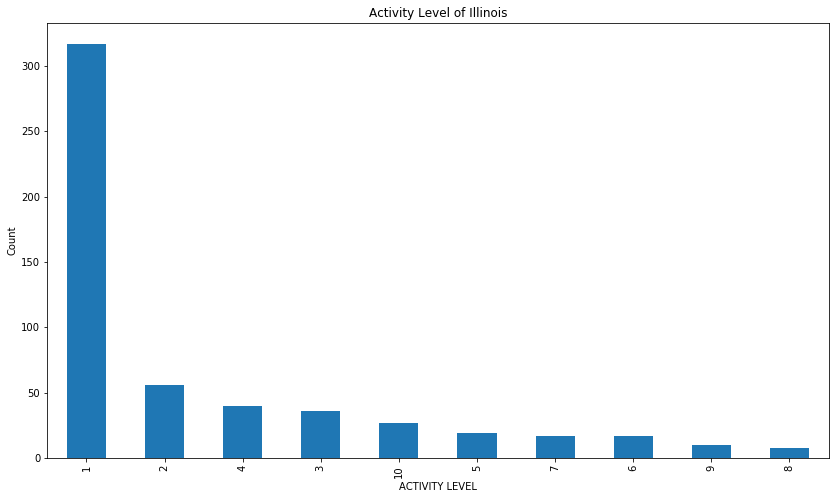

In [81]:
# Class distribution of unfiltered Illinois data

ax = merge['ACTIVITY LEVEL'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Activity Level of Illinois")
ax.set_xlabel("ACTIVITY LEVEL")
ax.set_ylabel("Count")

In [82]:
merge['ACTIVITY LEVEL'].value_counts()

1     317
2      56
4      40
3      36
10     27
5      19
7      17
6      17
9      10
8       8
Name: ACTIVITY LEVEL, dtype: int64

In [93]:
act_level_df_1 = shuffled_df.loc[shuffled_df['ACTIVITY LEVEL'] == 1].sample(n=50,random_state=42)

NameError: name 'shuffled_df' is not defined

In [ ]:
act_level_df_2 = pd.DataFrame()

In [ ]:
act_level_df_2

In [ ]:
for i in range(1,10):
    print(i)
    act_level_df_2 = pd.concat([act_level_df_2, shuffled_df.loc[shuffled_df['ACTIVITY LEVEL'] == i].sample(n=8,random_state=42)])

In [ ]:
act_level_df_2.shape

In [96]:
level_group_map = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6:1, 7:1, 8:2, 9:2, 10:2}
merge["level_group"] = merge["ACTIVITY LEVEL"].map(level_group_map).astype(float)

In [ ]:
merge.head()

In [84]:
columns = ['Total Number of Posts', 'Fear', 'Anger', 'Joy', 'Sadness', 'Surprise', 'Neutral', 'Disgust', 'No Emotion Attached']

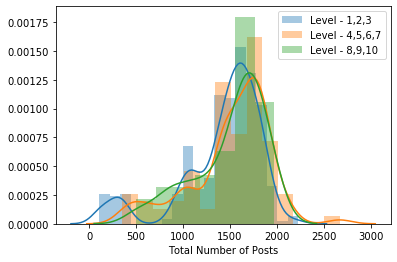

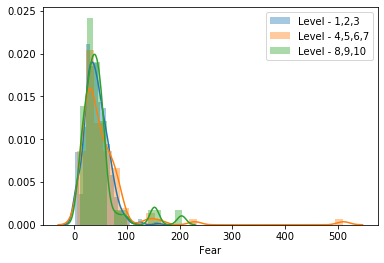

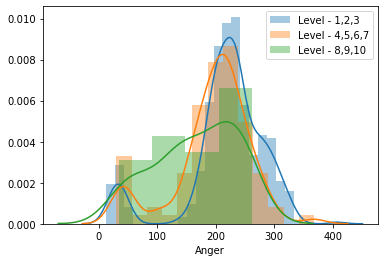

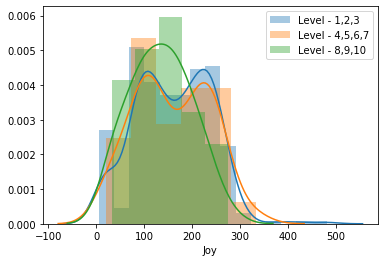

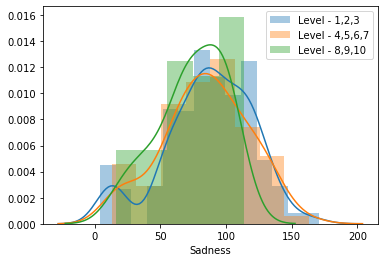

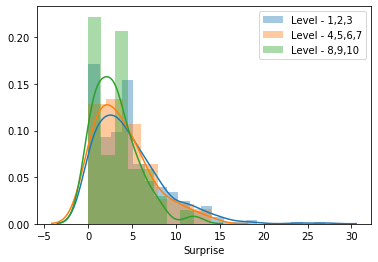

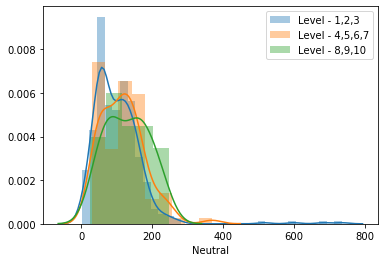

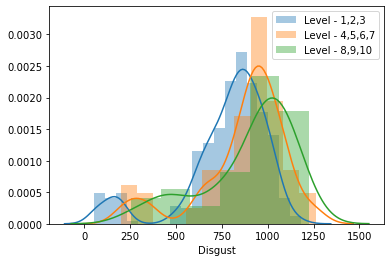

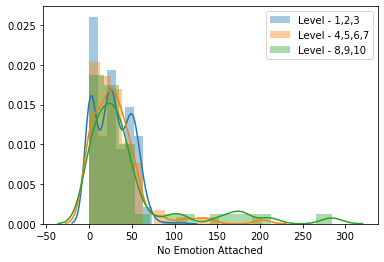

In [98]:
# Distribution of posts for unfiltered Illinois data based on Levels
for measure in columns:
    sns.distplot(merge.loc[merge["level_group"] == 0, measure].dropna())
    sns.distplot(merge.loc[merge["level_group"] == 1, measure].dropna())    
    sns.distplot(merge.loc[merge["level_group"] == 2, measure].dropna())
    plt.legend(["Level - 1,2,3", "Level - 4,5,6,7", "Level - 8,9,10"])
    plt.show()

In [99]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
#varlist = ['Total Number of Posts', 'Fear', 'Anger', 'Joy','Sadness', 'Surprise', 'Neutral', 'Disgust', 'No Emotion Attached']
varlist = ['ACTIVITY LEVEL', 'Total Number of Posts', 'Fear', 'Anger', 'Joy','Sadness', 'Surprise', 'Neutral', 'Disgust', 'No Emotion Attached']

# Scale these variables using 'fit_transform'
merge[varlist] = scaler.fit_transform(merge[varlist])

In [ ]:
merge.shape

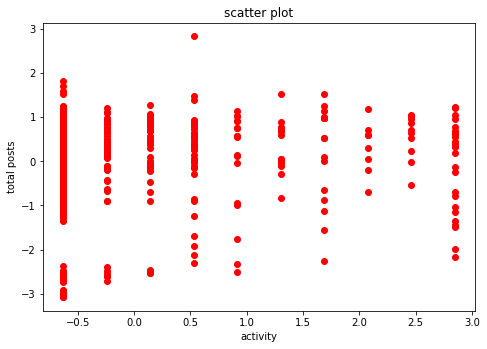

In [100]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(merge['ACTIVITY LEVEL'], merge['Total Number of Posts'], color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('activity')
ax.set_ylabel('total posts')
ax.set_title('scatter plot')
plt.show()

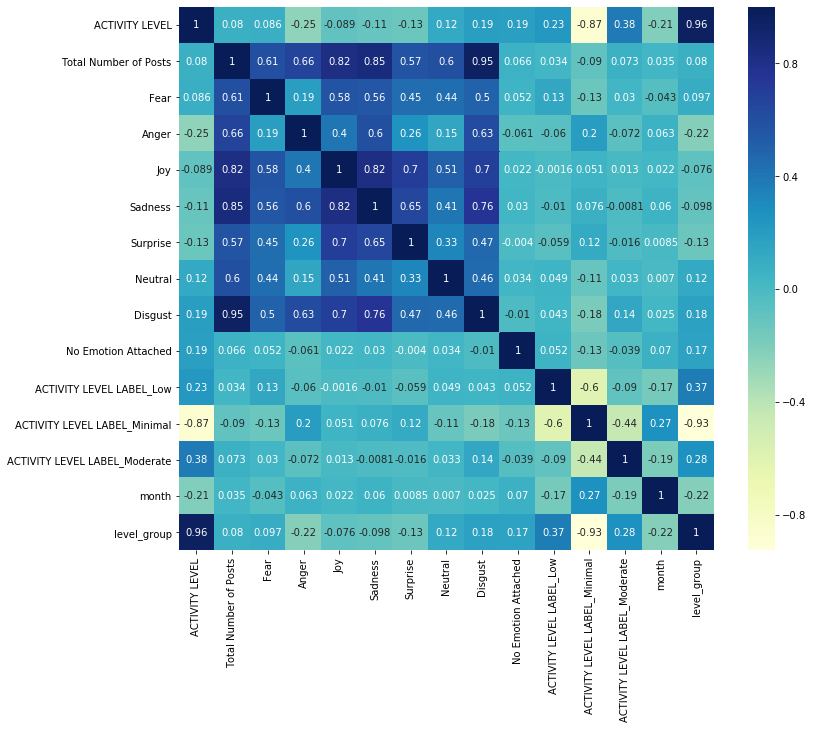

In [101]:
# Figure size
#plt.figure(figsize=(16,14))
plt.figure(figsize=(12,10))

# Heatmap
sns.heatmap(merge.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
merge.head()

test correrlation of total posts and all emotions with activity and activity level

In [86]:
from scipy import stats

In [87]:
for i in columns:
    print('Correlation of ACTIVITY LEVEL with ' +i+' is '+str(stats.pointbiserialr(merge['ACTIVITY LEVEL'], merge[i])[0])+' and p-value is '+str(stats.pointbiserialr(merge['ACTIVITY LEVEL'], merge[i])[1]))

Correlation of ACTIVITY LEVEL with Total Number of Posts is 0.08024108288404853 and p-value is 0.060735958899338124
Correlation of ACTIVITY LEVEL with Fear is 0.08561001687032878 and p-value is 0.04535524181945663
Correlation of ACTIVITY LEVEL with Anger is -0.2494511718270741 and p-value is 3.3272803448552226e-09
Correlation of ACTIVITY LEVEL with Joy is -0.08898974753102518 and p-value is 0.03746473655595915
Correlation of ACTIVITY LEVEL with Sadness is -0.1129490355688324 and p-value is 0.00819136931486347
Correlation of ACTIVITY LEVEL with Surprise is -0.12815825110154383 and p-value is 0.0026741659224009807
Correlation of ACTIVITY LEVEL with Neutral is 0.12217139747819013 and p-value is 0.004215906908365603
Correlation of ACTIVITY LEVEL with Disgust is 0.19364599277522254 and p-value is 5.0695626564991275e-06
Correlation of ACTIVITY LEVEL with No Emotion Attached is 0.1850597293323806 and p-value is 1.3248399734177017e-05


In [89]:
merge.head()

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate,week,month
week,,,,,,,,,,,,,,,
2009-07-10,1,148,7,27,12,10,0,16,74,2,0,1,0,2009-07-10,7
2009-07-17,1,169,7,16,16,8,0,19,98,5,0,1,0,2009-07-17,7
2009-07-24,1,179,7,33,12,10,0,18,99,0,0,1,0,2009-07-24,7
2009-07-31,1,124,6,21,10,4,0,14,68,1,0,1,0,2009-07-31,7
2009-08-07,1,125,4,17,17,4,0,13,69,1,0,1,0,2009-08-07,8


In [96]:
merge_month_filtered.to_csv("illinois-transformed.csv", encoding='utf-8', index=False)

In [90]:
merge2.head()

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached,ACTIVITY LEVEL LABEL_Low,ACTIVITY LEVEL LABEL_Minimal,ACTIVITY LEVEL LABEL_Moderate,week,month
week,,,,,,,,,,,,,,,
2009-07-10,1,597,32,78,46,23,0,59,352,7,0,1,0,2009-07-10,7
2009-07-17,3,830,30,105,84,45,2,91,462,11,0,1,0,2009-07-17,7
2009-07-24,1,923,37,131,72,56,2,100,515,10,0,1,0,2009-07-24,7
2009-07-31,1,650,21,105,61,43,1,72,339,8,0,1,0,2009-07-31,7
2009-08-07,1,538,21,65,49,31,1,65,302,4,0,1,0,2009-08-07,8


In [97]:
merge_month_filtered2.to_csv("cali-transformed.csv", encoding='utf-8', index=False)

### Modelling

In [88]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [106]:
merge = merge.drop(['ACTIVITY LEVEL LABEL_Low', 'ACTIVITY LEVEL LABEL_Minimal', 'ACTIVITY LEVEL LABEL_Moderate', 'level_group'], axis = 1)

KeyError: "['ACTIVITY LEVEL LABEL_Low' 'ACTIVITY LEVEL LABEL_Minimal'\n 'ACTIVITY LEVEL LABEL_Moderate' 'level_group'] not found in axis"

In [107]:
merge_month_filtered = merge_month_filtered.drop(['ACTIVITY LEVEL LABEL_Low', 'ACTIVITY LEVEL LABEL_Minimal', 'ACTIVITY LEVEL LABEL_Moderate'], axis = 1)

In [108]:
merge_month_filtered2 = merge_month_filtered2.drop(['ACTIVITY LEVEL LABEL_Low', 'ACTIVITY LEVEL LABEL_Minimal', 'ACTIVITY LEVEL LABEL_Moderate'], axis = 1)

In [109]:
merge2 = merge2.drop(['ACTIVITY LEVEL LABEL_Low', 'ACTIVITY LEVEL LABEL_Minimal', 'ACTIVITY LEVEL LABEL_Moderate'], axis = 1)

In [110]:
merge_month_filtered.head(2)

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,,
2009-10-02,7,766,23,42,37,24,0,81,356,203
2009-10-09,10,857,29,34,37,40,1,74,431,211


In [111]:
merge_month_filtered2.head(2)

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,,
2009-10-02,10,3363,69,173,144,111,0,391,1459,1016
2009-10-09,10,3573,84,202,134,111,1,326,1604,1111


Text(0, 0.5, 'Count')

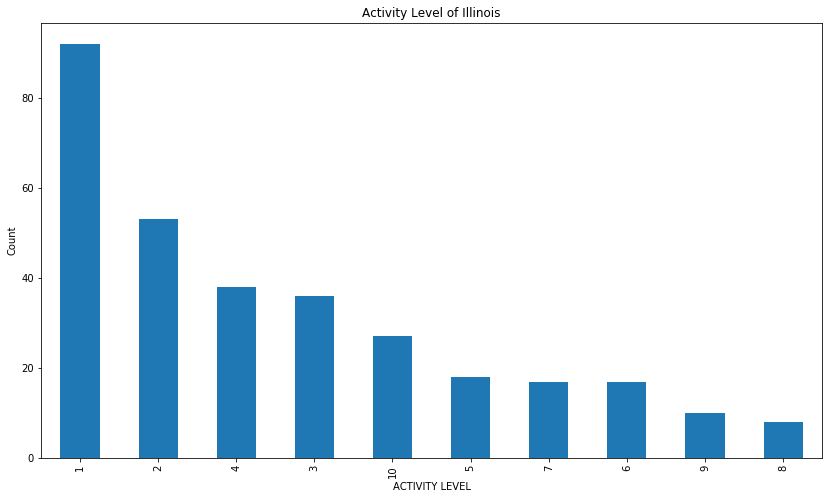

In [112]:
ax = merge_month_filtered['ACTIVITY LEVEL'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Activity Level of Illinois")
ax.set_xlabel("ACTIVITY LEVEL")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

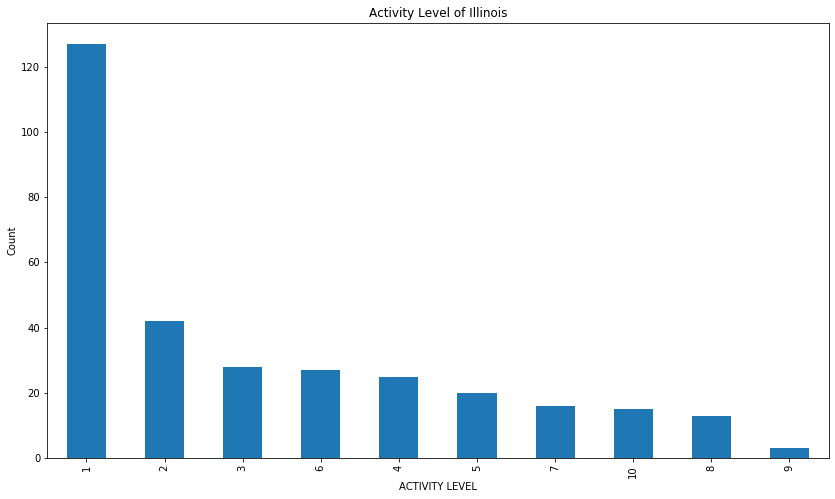

In [113]:
ax = merge_month_filtered2['ACTIVITY LEVEL'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Activity Level of Illinois")
ax.set_xlabel("ACTIVITY LEVEL")
ax.set_ylabel("Count")

In [117]:
# illinois data
# splitting into X and y
X = merge_month_filtered.drop("ACTIVITY LEVEL", axis = 1)
y = merge_month_filtered['ACTIVITY LEVEL'].values.astype(int)

In [115]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

In [ ]:
X_train = merge.drop("ACTIVITY LEVEL", axis = 1)
y_train = merge['ACTIVITY LEVEL'].values.astype(int)

In [116]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [137]:
X_test = merge_month_filtered2.drop("ACTIVITY LEVEL", axis = 1)
y_test = merge_month_filtered2['ACTIVITY LEVEL'].values.astype(int)

In [129]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
X_train = X_train.drop(['level_group'], axis = 1)

In [118]:
X_train_scaled = scale(X)
X_test_scaled = scale(X_test)

In [ ]:
# X_train_scaled = scale(X_test)
# X_test_scaled = scale(X_train)

In [119]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y.ravel()) 

Using TensorFlow backend.


In [121]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 10)))

After OverSampling, the shape of train_X: (920, 9)
After OverSampling, the shape of train_y: (920,) 

After OverSampling, counts of label '1': 92
After OverSampling, counts of label '0': 92


In [142]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_scaled)

In [122]:
model = SVC(C = 1, kernel='rbf')
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_scaled)

# model = SVC(C = 1, kernel='rbf')
# model.fit(X_train_scaled, y_test)
# y_pred = model.predict(X_train_scaled)

In [123]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[15,  1,  3,  1,  1,  4,  1,  1,  0,  0],
       [ 3,  4,  1,  1,  0,  1,  1,  1,  0,  0],
       [ 0,  0, 11,  1,  0,  0,  1,  0,  0,  0],
       [ 3,  0,  4,  3,  1,  0,  1,  1,  0,  0],
       [ 0,  1,  2,  0,  0,  1,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  8]], dtype=int64)

In [124]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
# print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
# print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.5578947368421052


In [125]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [126]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002620,0.001273,0.000406,0.000497,1,0.01,"{'C': 1, 'gamma': 0.01}",0.222222,0.250000,0.363636,...,0.308081,0.063343,7,0.329545,0.322034,0.293785,0.288136,0.310734,0.308847,0.015885
1,0.005803,0.001549,0.000631,0.000519,1,0.001,"{'C': 1, 'gamma': 0.001}",0.200000,0.227273,0.363636,...,0.294545,0.068659,10,0.318182,0.310734,0.276836,0.276836,0.288136,0.294145,0.017253
2,0.003832,0.002645,0.002426,0.001981,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.200000,0.227273,0.363636,...,0.294545,0.068659,10,0.318182,0.310734,0.276836,0.276836,0.288136,0.294145,0.017253
3,0.005994,0.001562,0.001718,0.001409,10,0.01,"{'C': 10, 'gamma': 0.01}",0.222222,0.272727,0.386364,...,0.312626,0.072249,6,0.403409,0.384181,0.344633,0.327684,0.372881,0.366558,0.027205
4,0.004194,0.000976,0.001334,0.001235,10,0.001,"{'C': 10, 'gamma': 0.001}",0.222222,0.250000,0.363636,...,0.308081,0.063343,7,0.329545,0.322034,0.293785,0.288136,0.310734,0.308847,0.015885
5,0.002534,0.000929,0.000199,0.000399,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.200000,0.227273,0.363636,...,0.294545,0.068659,10,0.318182,0.310734,0.276836,0.276836,0.288136,0.294145,0.017253
6,0.005263,0.000136,0.000584,0.000504,100,0.01,"{'C': 100, 'gamma': 0.01}",0.266667,0.272727,0.431818,...,0.339697,0.084829,1,0.534091,0.536723,0.491525,0.474576,0.491525,0.505688,0.025056
7,0.003970,0.000189,0.001815,0.001829,100,0.001,"{'C': 100, 'gamma': 0.001}",0.222222,0.272727,0.431818,...,0.326263,0.080799,4,0.392045,0.378531,0.344633,0.333333,0.372881,0.364285,0.021871
8,0.005272,0.000882,0.000822,0.000757,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.222222,0.250000,0.363636,...,0.308081,0.063343,7,0.329545,0.322034,0.293785,0.288136,0.310734,0.308847,0.015885
9,0.023179,0.004484,0.000930,0.001552,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.222222,0.250000,0.363636,...,0.326263,0.078200,3,0.761364,0.734463,0.740113,0.745763,0.779661,0.752273,0.016372


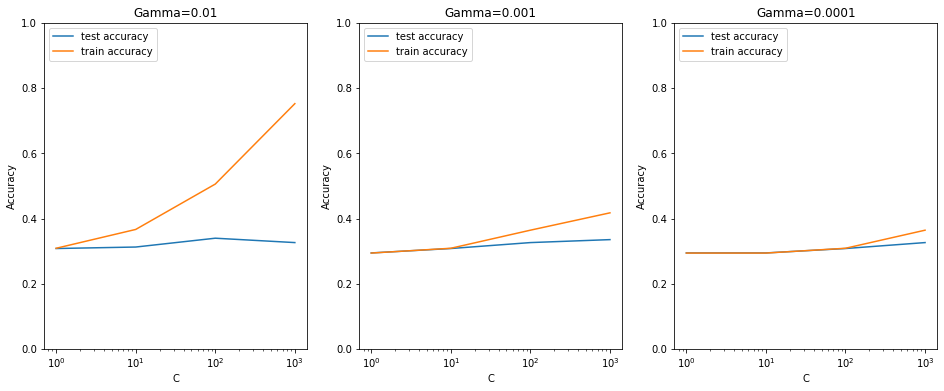

In [127]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [128]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.3396969696969697 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [130]:
merge_month_filtered.head(2)

,ACTIVITY LEVEL,Total Number of Posts,Fear,Anger,Joy,Sadness,Surprise,Neutral,Disgust,No Emotion Attached
week,,,,,,,,,,
2009-10-02,7,766,23,42,37,24,0,81,356,203
2009-10-09,10,857,29,34,37,40,1,74,431,211


## Random Forest

Running the Random Forest algo on Illinois data first

In [132]:
# Putting feature variable to X
X = merge_month_filtered.drop('ACTIVITY LEVEL',axis=1)

# Putting response variable to y
y = merge_month_filtered['ACTIVITY LEVEL']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [133]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [134]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
# Making predictions
predictions = rfc.predict(X_test)

In [137]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [138]:
# report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.42      0.83      0.56        23
           2       0.40      0.17      0.24        24
           3       0.11      0.25      0.15         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.58      0.88      0.70         8

    accuracy                           0.34        95
   macro avg       0.15      0.21      0.16        95
weighted avg       0.26      0.34      0.27        95



In [139]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[19  1  1  1  0  0  1  0  0  0]
 [ 9  4  7  3  0  1  0  0  0  0]
 [ 4  1  2  0  0  0  0  0  0  1]
 [ 4  2  5  0  0  0  0  0  0  1]
 [ 3  0  0  1  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  0  0  0  0]
 [ 3  1  1  0  1  0  0  0  0  2]
 [ 0  0  1  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  7]]


In [140]:
print(accuracy_score(y_test,predictions))

0.3368421052631579


### Tuning max_depth

In [144]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [145]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.162413,0.035720,0.015602,0.003228,2,{'max_depth': 2},0.355556,0.340909,0.340909,0.340909,...,0.339293,0.011983,1,0.352273,0.361582,0.372881,0.355932,0.378531,0.364240,0.009982
1,0.189026,0.013019,0.017613,0.001211,7,{'max_depth': 7},0.333333,0.363636,0.318182,0.318182,...,0.325758,0.022473,2,0.948864,0.966102,0.920904,0.954802,0.966102,0.951355,0.016615
2,0.192441,0.006850,0.013899,0.005081,12,{'max_depth': 12},0.288889,0.272727,0.318182,0.295455,...,0.285051,0.022808,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.194959,0.026648,0.017306,0.002536,17,{'max_depth': 17},0.311111,0.318182,0.340909,0.318182,...,0.307677,0.030540,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


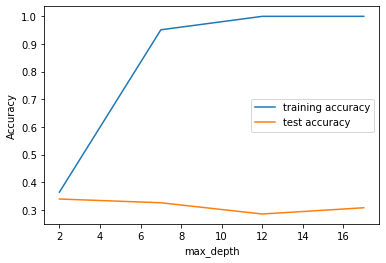

In [146]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [148]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model 
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [149]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.181104,0.024661,0.016394,0.003207,100,{'n_estimators': 100},0.377778,0.386364,0.363636,0.318182,...,0.357374,0.024912,1,0.517045,0.570621,0.570621,0.564972,0.570621,0.558776,0.020980
1,0.824014,0.078558,0.071570,0.003771,500,{'n_estimators': 500},0.377778,0.363636,0.340909,0.318182,...,0.348283,0.020594,2,0.562500,0.576271,0.519774,0.553672,0.570621,0.556568,0.019915
2,1.456537,0.101196,0.121886,0.003414,900,{'n_estimators': 900},0.377778,0.386364,0.340909,0.318182,...,0.348283,0.028937,2,0.534091,0.570621,0.514124,0.542373,0.570621,0.546366,0.021830
3,2.121984,0.089477,0.159071,0.029960,1300,{'n_estimators': 1300},0.377778,0.363636,0.340909,0.295455,...,0.339192,0.029812,4,0.528409,0.570621,0.531073,0.542373,0.576271,0.549750,0.019988


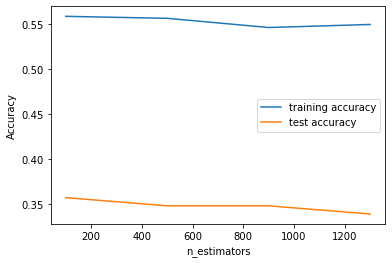

In [150]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [153]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.165424,0.020107,0.016807,0.001176,4,{'max_features': 4},0.377778,0.363636,0.363636,0.318182,...,0.343737,0.031417,2,0.585227,0.536723,0.519774,0.548023,0.587571,0.555464,0.026822
1,0.186947,0.036961,0.015443,0.004766,8,{'max_features': 8},0.333333,0.386364,0.318182,0.386364,...,0.353030,0.028183,1,0.545455,0.581921,0.531073,0.598870,0.621469,0.575758,0.033397
2,0.060169,0.009856,0.000000,0.000000,14,{'max_features': 14},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.075197,0.005349,0.000000,0.000000,20,{'max_features': 20},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.071082,0.008662,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


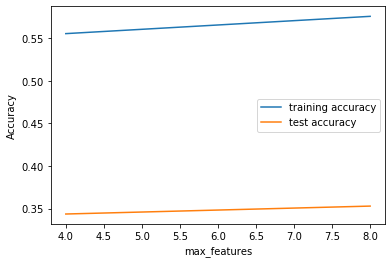

In [155]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

In [157]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.132059,0.017050,0.013479,0.002722,100,{'min_samples_leaf': 100},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
1,0.120099,0.027380,0.011448,0.002524,150,{'min_samples_leaf': 150},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
2,0.126572,0.013678,0.015388,0.001873,200,{'min_samples_leaf': 200},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
3,0.143331,0.006045,0.014971,0.002757,250,{'min_samples_leaf': 250},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
4,0.165291,0.016937,0.018090,0.001552,300,{'min_samples_leaf': 300},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193


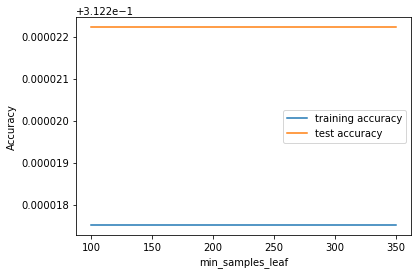

In [159]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [160]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.138315,0.010100,0.015090,0.002578,200,{'min_samples_split': 200},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
1,0.122242,0.022640,0.014713,0.003861,250,{'min_samples_split': 250},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
2,0.128763,0.014923,0.013228,0.002736,300,{'min_samples_split': 300},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
3,0.133633,0.014891,0.015323,0.001801,350,{'min_samples_split': 350},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193
4,0.137568,0.003623,0.013141,0.002219,400,{'min_samples_split': 400},0.311111,0.318182,0.318182,0.318182,...,0.312222,0.00882,1,0.3125,0.310734,0.310734,0.310734,0.316384,0.312218,0.002193


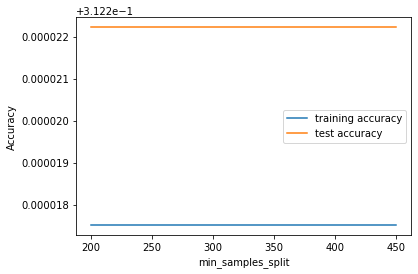

In [162]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [163]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [164]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   10.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [165]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.3122300382574355 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [168]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [169]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [170]:
# predict
predictions = rfc.predict(X_test)

In [171]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.24      1.00      0.39        23
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         8

    accuracy                           0.24        95
   macro avg       0.02      0.10      0.04        95
weighted avg       0.06      0.24      0.09        95



In [173]:
print(confusion_matrix(y_test,predictions))

[[23  0  0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]]


Random Forest classifies all points as class 1. This seems to happen due to class imbalance. 

Grouping California's month filtered data based on Activity Level

In [175]:
level_group_map = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6:1, 7:1, 8:1, 9:1, 10:1}
merge_month_filtered2["level_group"] = merge_month_filtered2["ACTIVITY LEVEL"].map(level_group_map).astype(float)

Text(0, 0.5, 'Count')

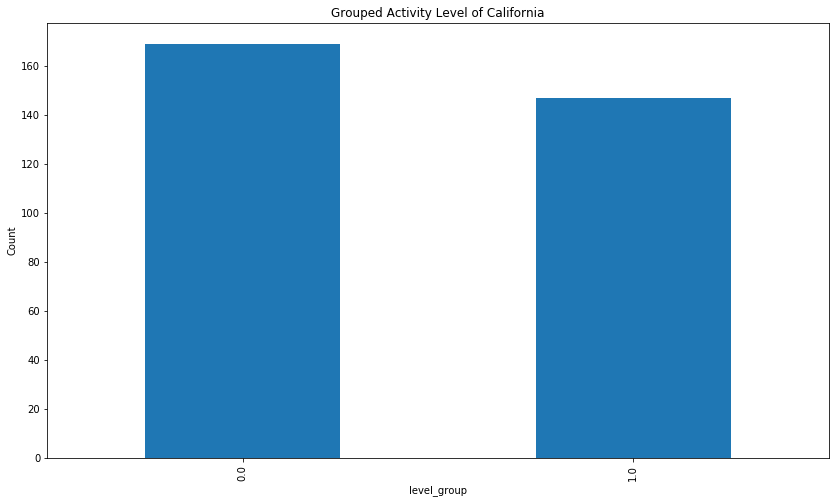

In [178]:
ax = merge_month_filtered2['level_group'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Grouped Activity Level of California")
ax.set_xlabel("level_group")
ax.set_ylabel("Count")

In [179]:
merge_month_filtered2=merge_month_filtered2.drop("ACTIVITY LEVEL", axis = 1)

In [180]:
# splitting into X and y
X = merge_month_filtered2.drop("level_group", axis = 1)
y = merge_month_filtered2['level_group'].values.astype(int)

In [181]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

In [182]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [183]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001958,0.001578,0.001151,0.001541,1,0.01,"{'C': 1, 'gamma': 0.01}",0.622222,0.613636,0.659091,...,0.633535,0.045805,9,0.659091,0.644068,0.627119,0.644068,0.644068,0.643683,0.010122
1,0.000800,0.001599,0.001619,0.001983,1,0.001,"{'C': 1, 'gamma': 0.001}",0.533333,0.477273,0.590909,...,0.538485,0.068041,10,0.539773,0.553672,0.525424,0.610169,0.559322,0.557672,0.028758
2,0.001877,0.001913,0.000267,0.000402,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.533333,0.477273,0.590909,...,0.538485,0.068041,10,0.539773,0.553672,0.525424,0.514124,0.559322,0.538463,0.016915
3,0.001442,0.000803,0.000207,0.000414,10,0.01,"{'C': 10, 'gamma': 0.01}",0.711111,0.681818,0.795455,...,0.742222,0.041088,3,0.778409,0.751412,0.774011,0.757062,0.779661,0.768111,0.011621
4,0.001851,0.001892,0.000798,0.001596,10,0.001,"{'C': 10, 'gamma': 0.001}",0.622222,0.613636,0.681818,...,0.638081,0.049123,7,0.653409,0.649718,0.627119,0.649718,0.655367,0.647066,0.010209
5,0.002331,0.001912,0.000799,0.001598,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.533333,0.477273,0.590909,...,0.538485,0.068041,10,0.539773,0.553672,0.525424,0.604520,0.559322,0.556542,0.026711
6,0.001856,0.002299,0.000824,0.001647,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733333,0.772727,0.795455,...,0.746667,0.032825,2,0.806818,0.785311,0.802260,0.802260,0.813559,0.802042,0.009333
7,0.002277,0.001681,0.000997,0.001529,100,0.001,"{'C': 100, 'gamma': 0.001}",0.711111,0.659091,0.795455,...,0.728586,0.044870,5,0.750000,0.751412,0.740113,0.745763,0.774011,0.752260,0.011565
8,0.001724,0.001780,0.000223,0.000447,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.622222,0.613636,0.681818,...,0.638081,0.049123,7,0.653409,0.649718,0.627119,0.649718,0.655367,0.647066,0.010209
9,0.005223,0.001583,0.000400,0.000489,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.711111,0.750000,0.795455,...,0.737677,0.038647,4,0.852273,0.841808,0.841808,0.870056,0.830508,0.847291,0.013303


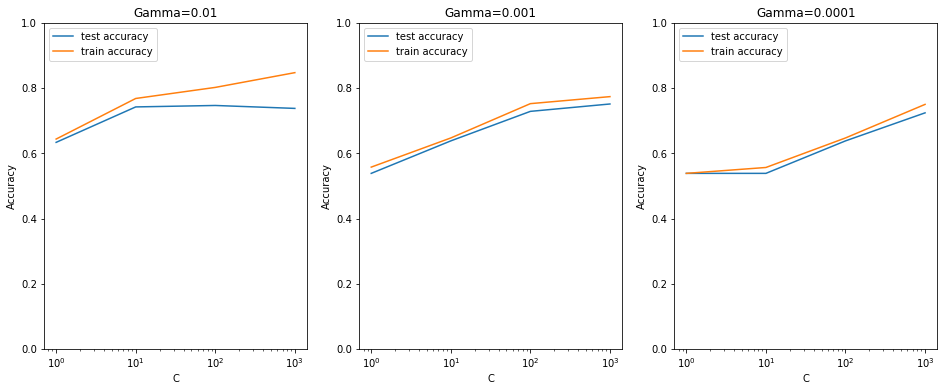

In [184]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [185]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7512121212121212 corresponding to hyperparameters {'C': 1000, 'gamma': 0.001}


In [186]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [187]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    7.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [188]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.5384425521411823 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}
